In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import os

In [3]:
df = pd.read_csv(r'C:\Users\Hello\Downloads\Externs\Externs\Mini projects\fraudTrain.csv')
df1 = pd.read_csv(r'C:\Users\Hello\Downloads\Externs\Externs\Mini projects\fraudTest.csv')

In [4]:
df.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
Unnamed: 0               1296675 non-null int64
trans_date_trans_time    1296675 non-null object
cc_num                   1296675 non-null int64
merchant                 1296675 non-null object
category                 1296675 non-null object
amt                      1296675 non-null float64
first                    1296675 non-null object
last                     1296675 non-null object
gender                   1296675 non-null object
street                   1296675 non-null object
city                     1296675 non-null object
state                    1296675 non-null object
zip                      1296675 non-null int64
lat                      1296675 non-null float64
long                     1296675 non-null float64
city_pop                 1296675 non-null int64
job                      1296675 non-null object
dob                      1296675 non-null object
trans_

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
Unnamed: 0               555719 non-null int64
trans_date_trans_time    555719 non-null object
cc_num                   555719 non-null int64
merchant                 555719 non-null object
category                 555719 non-null object
amt                      555719 non-null float64
first                    555719 non-null object
last                     555719 non-null object
gender                   555719 non-null object
street                   555719 non-null object
city                     555719 non-null object
state                    555719 non-null object
zip                      555719 non-null int64
lat                      555719 non-null float64
long                     555719 non-null float64
city_pop                 555719 non-null int64
job                      555719 non-null object
dob                      555719 non-null object
trans_num                5

In [7]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

# Data Visualization

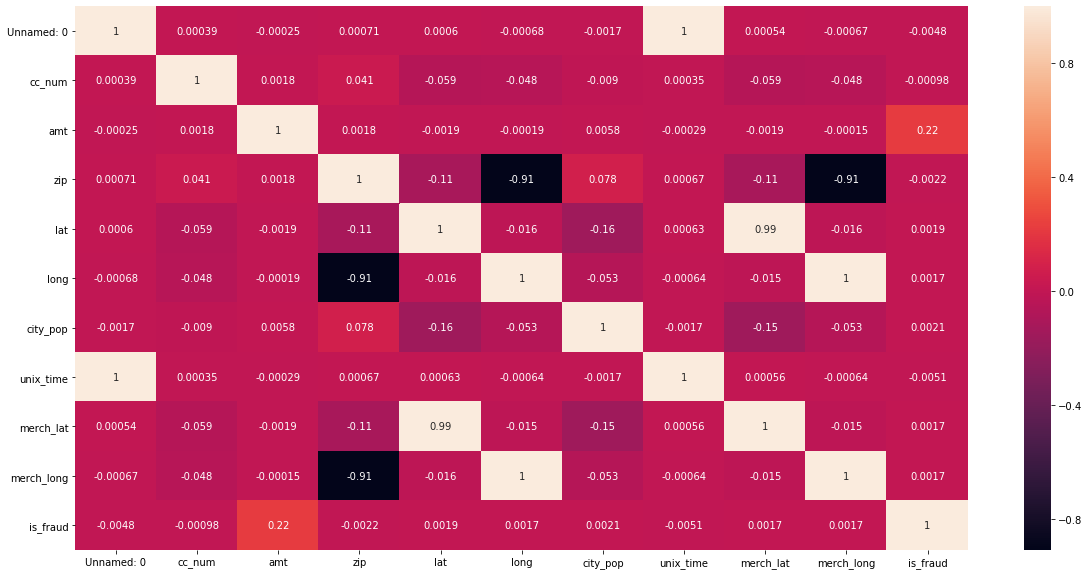

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [9]:
df.loc[df['is_fraud'] == 1].sort_values('amt', ascending=False).head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1262544,1262544,2020-06-08 22:14:13,3562793934111141,fraud_Kuhn LLC,shopping_pos,1376.04,Meagan,Edwards,F,10376 Bullock Rapid,...,38.9456,-75.9777,777,Television production assistant,1997-04-17,9a7f96694d672499c10b6085fadecd30,1370729653,38.004592,-75.446751,1
514148,514148,2019-08-10 22:10:23,3500969075198072,fraud_Metz-Boehm,shopping_pos,1371.81,Kenneth,Sanchez,M,0110 Ashley Forest,...,47.2271,-117.0819,895,Clothing/textile technologist,1999-05-31,20cf5453224328229e06ae7b4df10302,1344636623,47.065996,-116.262297,1


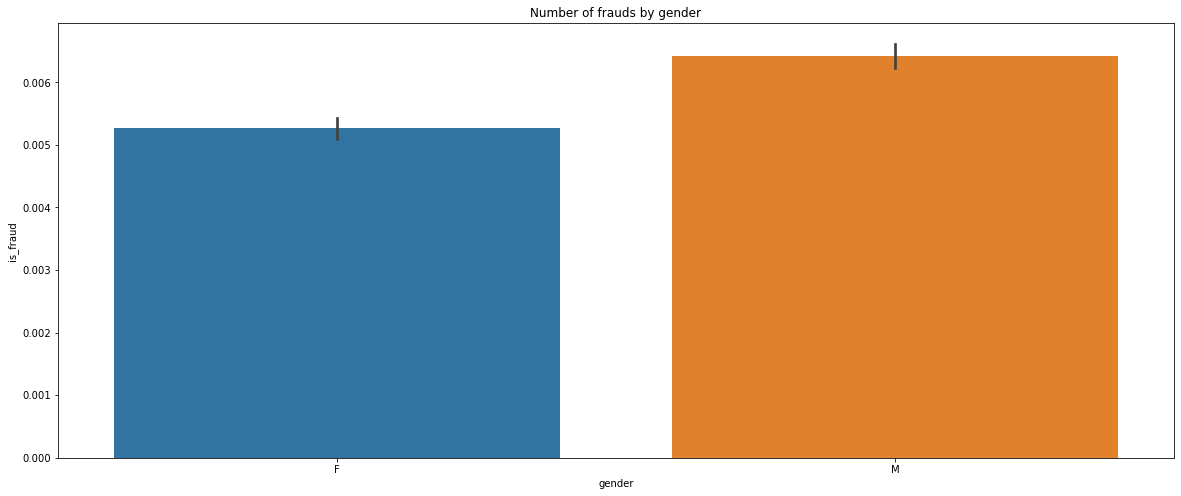

In [10]:
# Gender
plt.figure(figsize=(20,8))
plt.title('Number of frauds by gender')
sns.barplot(x="gender", y='is_fraud' ,data=df)

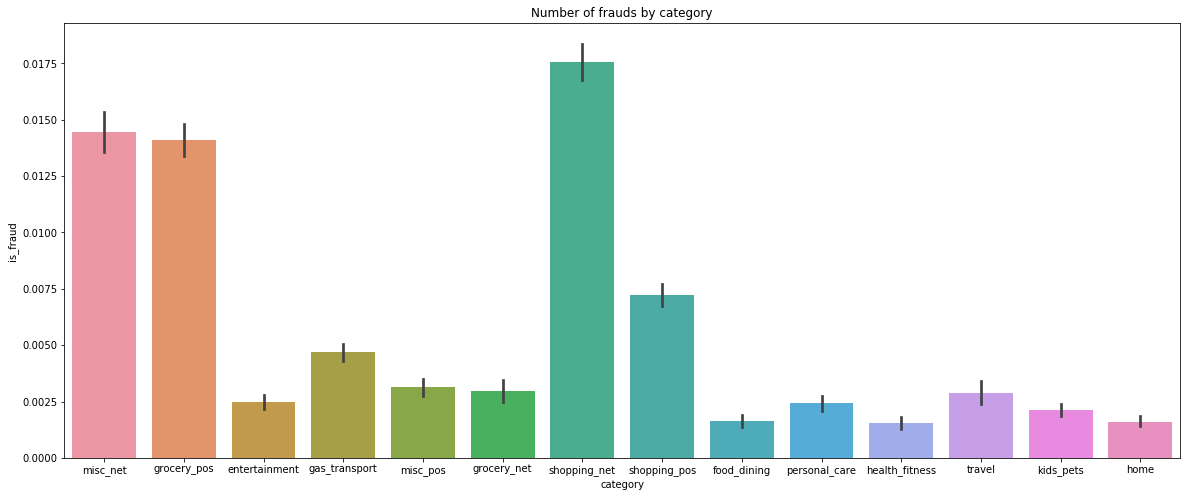

In [11]:
# Category
plt.figure(figsize=(20,8))
plt.title('Number of frauds by category')
sns.barplot(x="category", y='is_fraud' ,data=df)

# Preprocessing


In [12]:
print("Number of is_fraud data",df['is_fraud'].value_counts())

Number of is_fraud data 0    1289169
1       7506
Name: is_fraud, dtype: int64


In [13]:
from sklearn.utils import resample 
df_minority = df[df.iloc[:,22].values==0] # .iloc[:,22] = is_fraud
df_majority = df[df.iloc[:,22].values==1] 
 
# Downsample majority class
df_minority_downsampled = resample(df_minority,
                                 n_samples=7506,     # to match minority class
                                 random_state=42)    # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_minority_downsampled, df_majority])
 
# Display new class counts
df_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15012 entries, 123118 to 1295733
Data columns (total 23 columns):
Unnamed: 0               15012 non-null int64
trans_date_trans_time    15012 non-null object
cc_num                   15012 non-null int64
merchant                 15012 non-null object
category                 15012 non-null object
amt                      15012 non-null float64
first                    15012 non-null object
last                     15012 non-null object
gender                   15012 non-null object
street                   15012 non-null object
city                     15012 non-null object
state                    15012 non-null object
zip                      15012 non-null int64
lat                      15012 non-null float64
long                     15012 non-null float64
city_pop                 15012 non-null int64
job                      15012 non-null object
dob                      15012 non-null object
trans_num                15012 non-null

In [14]:
print("Number of is_fraud data",df_downsampled['is_fraud'].value_counts())

Number of is_fraud data 1    7506
0    7506
Name: is_fraud, dtype: int64


## Train Data

In [15]:
# Train data
# Change date to be date type
df_downsampled['trans_date_trans_time'] = pd.to_datetime(df_downsampled['trans_date_trans_time'])
# Create column week number
df_downsampled['week_number'] = df_downsampled['trans_date_trans_time'].dt.dayofweek
assert df_downsampled['week_number'].max() == 6
# Create column month number
df_downsampled['month_number'] = df_downsampled['trans_date_trans_time'].dt.month
assert df_downsampled['month_number'].max() == 12
# Create column year
df_downsampled['year'] = df_downsampled['trans_date_trans_time'].dt.year
df_downsampled.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,week_number,month_number,year
123118,123118,2019-03-10 03:24:30,30011465039817,fraud_Huels-Nolan,gas_transport,67.66,Lisa,Garcia,F,213 Gill Expressway,...,Human resources officer,1971-10-14,6744f95a0c456529c4a35cb30a5cb396,1331349870,42.974691,-73.944930,0,6,3,2019
675160,675160,2019-10-14 15:40:47,2288813824604479,fraud_Yost-Rogahn,personal_care,47.79,Barbara,Norman,F,6278 Stephanie Unions,...,Herbalist,1981-08-29,7c53e2c5bb6aa689753574d9f8ae623f,1350229247,41.046486,-74.132901,0,0,10,2019
133167,133167,2019-03-14 15:21:51,2266735643685262,fraud_Roob-Okuneva,health_fitness,24.17,Carlos,Chung,M,8957 Russell Key,...,Curator,1972-07-25,0b3a94c9a2f622d2f3c3399a6cc3910b,1331738511,34.956184,-86.986784,0,3,3,2019
261154,261154,2019-05-10 09:04:20,4384910379661778,fraud_Howe Ltd,misc_pos,51.69,Michelle,Russell,F,55505 Christy Via,...,Naval architect,1949-04-24,35caf2d1468a377e45235274b005aa02,1336640660,46.851874,-97.269843,0,4,5,2019
111322,111322,2019-03-04 12:54:01,2356276337669917,fraud_Mayert Group,shopping_pos,5.89,Benjamin,Harris,M,0881 Lori Pines,...,Paediatric nurse,1981-02-15,4ea34c698a6a4ad782a74a051f136aca,1330865641,38.303450,-75.346029,0,0,3,2019


## Test Data

In [16]:
# Test Data
# Change date to be date type
df1['trans_date_trans_time'] = pd.to_datetime(df1['trans_date_trans_time'])
# Create column week number
df1['week_number'] = df1['trans_date_trans_time'].dt.dayofweek
assert df1['week_number'].max() == 6
# Create column month number
df1['month_number'] = df1['trans_date_trans_time'].dt.month
assert df1['month_number'].max() == 12
# Create column year
df1['year'] = df1['trans_date_trans_time'].dt.year
df1.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,week_number,month_number,year
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,6,6,2020
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,6,6,2020
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,6,6,2020
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,6,6,2020
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,6,6,2020


## Category (One-Hot Endcoding)
Category is Nominal Data that cannot work with model,So I will change category to numerical by One Hot Encoding

### Train Data

In [18]:
category_onehot = pd.get_dummies(df_downsampled.category, prefix='category')
df_downsampled = df_downsampled.join(category_onehot)
df_downsampled.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
126,126,2019-01-01 01:33:52,3567879740649740,fraud_Koss and Sons,gas_transport,58.79,Tanya,Williams,F,566 Megan Well,...,0,0,0,0,0,0,0,0,0,0
159,159,2019-01-01 01:56:51,30442439074871,"fraud_Parisian, Schiller and Altenwerth",misc_net,14.03,Linda,Sanchez,F,6574 William Hill Apt. 375,...,0,0,0,0,1,0,0,0,0,0
215,215,2019-01-01 02:38:49,4710826438164847414,fraud_Strosin-Cruickshank,grocery_pos,128.24,Juan,Henry,M,9795 Lori Island Suite 346,...,1,0,0,0,0,0,0,0,0,0
404,404,2019-01-01 05:19:42,4464457352619,fraud_Vandervort-Funk,grocery_pos,124.33,Breanna,Rodriguez,F,118 Cabrera Springs Apt. 105,...,1,0,0,0,0,0,0,0,0,0
727,727,2019-01-01 09:27:35,3554849923339851,fraud_Larson-Moen,entertainment,65.74,John,Hudson,M,886 Nicole Key,...,0,0,0,0,0,0,0,0,0,0


## Test Data

In [19]:
category_onehot_test_data = pd.get_dummies(df1.category, prefix='category')
df1 = df1.join(category_onehot_test_data)
df1.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,0,0,0,0,0,0,1,0,0,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,0,0,0,0,0,0,1,0,0,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,0,1,0,0,0,0,0,0,0,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,0,0,0,0,0,1,0,0,0,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,0,0,0,0,0,0,0,0,0,1


## Gender
Change gender from nominal to numerical

In [20]:
# Train data
df_downsampled['gender'] = df_downsampled['gender'].replace(['F','M'],[0,1])
# Test data
df1['gender'] = df1['gender'].replace(['F','M'],[0,1])

print('Gender of train dataset', df_downsampled['gender'].value_counts())
print('Gender of test dataset', df1['gender'].value_counts())

Gender of train dataset 0    7975
1    7091
Name: gender, dtype: int64
Gender of test dataset 0    304886
1    250833
Name: gender, dtype: int64


## Merchant
Convert Marchant to be numerical data

In [21]:
# Train data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x_train = df_downsampled['merchant']
df_downsampled['merchant_number'] = label_encoder.fit_transform(x_train)

# Test data
x_test = df1['merchant']
df1['merchant_number'] = label_encoder.fit_transform(x_test)

print('Merchant Number of train dataset',df_downsampled['merchant_number'])
print('Merchant Number of test dataset',df1['merchant_number'])

Merchant Number of train dataset 126        332
159        475
215        608
404        645
727        376
          ... 
1295710    645
1295733    332
1295801    442
1296013    300
1296098    104
Name: merchant_number, Length: 15066, dtype: int32
Merchant Number of test dataset 0         319
1         591
2         611
3         222
4         292
         ... 
555714    507
555715    264
555716    496
555717     75
555718    125
Name: merchant_number, Length: 555719, dtype: int32


## Age
Find Age from date of birth data

In [23]:
from datetime import date
def calculate_age(row):
    today = date.today()
    return today.year - row['dob'].year - ((today.month, today.day) < (row['dob'].month, row['dob'].day))

# Train data
df_downsampled['dob'] = pd.to_datetime(df_downsampled['dob'])
df_downsampled['age'] = df_downsampled['dob']
df_downsampled['age'] = df_downsampled.apply (lambda row: calculate_age(row), axis=1)

# Test data
df1['dob'] = pd.to_datetime(df1['dob'])
df1['age'] = df1['dob']
df1['age'] = df1.apply (lambda row: calculate_age(row), axis=1)

print('Age of train dataset', df_downsampled['age'].head(3))
print('Age of test dataset', df1['age'].head(3))

Age of train dataset 126    65
159    42
215    59
Name: age, dtype: int64
Age of test dataset 0    55
1    33
2    52
Name: age, dtype: int64


### Job
Convert Marchant to be numerical data

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Train data
x_train = df_downsampled['job']
df_downsampled['job_number'] = label_encoder.fit_transform(x_train)
print(df_downsampled['job_number'])

# Test data
x_test = df1['job']
df1['job_number'] = label_encoder.fit_transform(x_test)
print(df1['job_number'])

126        354
159        478
215        205
404        459
727         58
          ... 
1295710    423
1295733    222
1295801    155
1296013     70
1296098     86
Name: job_number, Length: 15066, dtype: int32
0         275
1         392
2         259
3         407
4         196
         ... 
555714    460
555715    198
555716    294
555717     58
555718    276
Name: job_number, Length: 555719, dtype: int32


# Select Data
For select features I would like to do 2 experiments: ExtraTreesClassifier, .abs().nlargest(), because i would like to find the best acurracy and the best prediction

In [25]:
# Unselect converted data
select_data = df_downsampled
select_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'week_number', 'month_number',
       'year', 'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'merchant_number', 'age',
       'job_number'],
      dtype='object')

In [26]:
select_data = select_data[['cc_num',
       'amt', 'gender', 'zip',
       'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'age', 'job_number',
       'week_number', 'month_number', 'year', 'category_entertainment',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'merchant_number','is_fraud']]
select_data.head()

,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,merchant_number,is_fraud
126,3567879740649740,58.79,0,13615,44.0577,-76.0196,1271,1325381632,44.015435,-76.027125,...,0,0,0,0,0,0,0,0,332,0
159,30442439074871,14.03,0,18433,41.5744,-75.5881,6508,1325383011,40.868184,-76.283066,...,0,0,1,0,0,0,0,0,475,0
215,4710826438164847414,128.24,1,59542,48.8328,-108.3961,192,1325385529,49.176720,-108.757243,...,0,0,0,0,0,0,0,0,608,0
404,4464457352619,124.33,0,32323,29.8826,-84.5964,217,1325395182,30.773425,-83.837856,...,0,0,0,0,0,0,0,0,645,0
727,3554849923339851,65.74,1,74074,36.1043,-97.0609,55345,1325410055,35.359894,-97.202209,...,0,0,0,0,0,0,0,0,376,0


## ExtraTreesClassifier

[1.30847723e-03 7.87207886e-02 3.34370404e-03 1.42383499e-03
 1.43687539e-03 1.36913174e-03 1.44755958e-03 2.17657707e-03
 1.42944450e-03 1.41207797e-03 3.02884839e-03 1.58295534e-03
 1.37346188e-03 2.56904042e-03 5.47966835e-04 1.73951898e-03
 3.91745194e-03 1.47505947e-03 6.93254013e-04 1.12931667e-02
 3.17239913e-03 7.67629254e-03 5.01394540e-03 5.87272181e-03
 1.02325934e-03 2.11592886e-03 1.90817434e-02 1.73688498e-03
 5.05751241e-04 1.29768180e-03 8.30214196e-01]


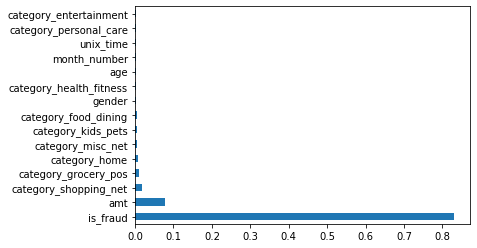

In [27]:
X = select_data.iloc[:,0:31]  #independent columns
y = select_data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

## nlargest

In [28]:
print(select_data.corr().abs().nlargest(15, 'is_fraud').index)

Index(['is_fraud', 'amt', 'category_shopping_net', 'category_grocery_pos',
       'category_home', 'category_misc_net', 'category_kids_pets',
       'category_health_fitness', 'category_food_dining',
       'category_personal_care', 'month_number', 'category_entertainment',
       'age', 'category_misc_pos', 'gender'],
      dtype='object')


In [29]:
#Select Train Data
select_data_train_extra_tree = df_downsampled[['amt','category_shopping_net','category_grocery_pos','category_home','category_misc_net',
                                         'category_kids_pets','category_health_fitness','gender','age','month_number',
                                         'category_food_dining','unix_time','category_personal_care','category_shopping_pos','is_fraud']]

select_data_train_abs_nlargest = df_downsampled[['amt', 'category_shopping_net', 'category_grocery_pos',
                                        'category_home', 'category_misc_net', 'category_kids_pets',
                                        'category_health_fitness', 'category_food_dining',
                                        'category_personal_care', 'month_number', 'category_entertainment',
                                        'age', 'category_misc_pos', 'gender','is_fraud']]

In [31]:
#Select Test Data
select_data_test_extra_tree = df1[['amt','category_shopping_net','category_grocery_pos','category_home','category_misc_net',
                                         'category_kids_pets','category_health_fitness','gender','age','month_number',
                                         'category_food_dining','unix_time','category_personal_care','category_shopping_pos','is_fraud']]

select_data_test_abs_nlargest = df1[['amt', 'category_shopping_net', 'category_grocery_pos',
                                        'category_home', 'category_misc_net', 'category_kids_pets',
                                        'category_health_fitness', 'category_food_dining',
                                        'category_personal_care', 'month_number', 'category_entertainment',
                                        'age', 'category_misc_pos', 'gender','is_fraud']]

In [32]:
# Prepare X_train y_train
X_train_extra_tree = select_data_train_extra_tree[['amt','category_shopping_net','category_grocery_pos','category_home','category_misc_net',
                                         'category_kids_pets','category_health_fitness','gender','age','month_number',
                                         'category_food_dining','unix_time','category_personal_care','category_shopping_pos']]
y_train_extra_tree = select_data_train_extra_tree['is_fraud']

X_train_abs_nlargest = select_data_train_abs_nlargest[['amt', 'category_shopping_net', 'category_grocery_pos',
                                        'category_home', 'category_misc_net', 'category_kids_pets',
                                        'category_health_fitness', 'category_food_dining',
                                        'category_personal_care', 'month_number', 'category_entertainment',
                                        'age', 'category_misc_pos', 'gender']]
y_train_abs_nlargest = select_data_train_abs_nlargest['is_fraud']

In [33]:
# Prepare X_test y_test
X_test_extra_tree = select_data_test_extra_tree[['amt','category_shopping_net','category_grocery_pos','category_home','category_misc_net',
                                         'category_kids_pets','category_health_fitness','gender','age','month_number',
                                         'category_food_dining','unix_time','category_personal_care','category_shopping_pos']]
y_test_extra_tree = select_data_test_extra_tree['is_fraud']

X_test_abs_nlargest = select_data_test_abs_nlargest[['amt', 'category_shopping_net', 'category_grocery_pos',
                                        'category_home', 'category_misc_net', 'category_kids_pets',
                                        'category_health_fitness', 'category_food_dining',
                                        'category_personal_care', 'month_number', 'category_entertainment',
                                        'age', 'category_misc_pos', 'gender']]
y_test_abs_nlargest = select_data_test_abs_nlargest['is_fraud']

## Scaler Data

In [34]:
from sklearn import preprocessing

### Scaler Train Data

In [35]:
# Scale X_train
# Extra Tree
scaler = preprocessing.MinMaxScaler()
newValue = scaler.fit_transform(X_train_extra_tree)
X_train_extra_tree_scaler = pd.DataFrame(newValue, columns=X_train_extra_tree.columns)
X_train_extra_tree_scaler

,amt,category_shopping_net,category_grocery_pos,category_home,category_misc_net,category_kids_pets,category_health_fitness,gender,age,month_number,category_food_dining,unix_time,category_personal_care,category_shopping_pos
0,0.003994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5875,0.000000,0.0,0.000000,0.0,0.0
1,0.000900,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.3000,0.000000,0.0,0.000030,0.0,0.0
2,0.008795,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5125,0.000000,0.0,0.000084,0.0,0.0
3,0.008524,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.1875,0.000000,0.0,0.000292,0.0,0.0
4,0.004474,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.7125,0.000000,0.0,0.000612,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15061,0.004588,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.3625,0.454545,0.0,0.999750,0.0,0.0
15062,0.000635,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1375,0.454545,0.0,0.999764,0.0,0.0
15063,0.006693,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.3875,0.454545,0.0,0.999806,0.0,0.0
15064,0.005938,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.3500,0.454545,0.0,0.999947,0.0,0.0


In [36]:
# Abs
scaler = preprocessing.MinMaxScaler()
newValue = scaler.fit_transform(X_train_abs_nlargest)
X_train_abs_nlargest_scaler = pd.DataFrame(newValue, columns=X_train_abs_nlargest.columns)
X_train_abs_nlargest_scaler

,amt,category_shopping_net,category_grocery_pos,category_home,category_misc_net,category_kids_pets,category_health_fitness,category_food_dining,category_personal_care,month_number,category_entertainment,age,category_misc_pos,gender
0,0.003994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5875,0.0,0.0
1,0.000900,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.3000,0.0,0.0
2,0.008795,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5125,0.0,1.0
3,0.008524,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.1875,0.0,0.0
4,0.004474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.7125,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15061,0.004588,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454545,0.0,0.3625,0.0,1.0
15062,0.000635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454545,0.0,0.1375,0.0,1.0
15063,0.006693,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454545,0.0,0.3875,0.0,0.0
15064,0.005938,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.454545,0.0,0.3500,0.0,0.0


### Scaler Test Data

In [38]:
# Scale X_test
# Extra Tree
scaler = preprocessing.MinMaxScaler()
newValue = scaler.fit_transform(X_test_extra_tree)
X_test_extra_tree_scaler = pd.DataFrame(newValue, columns=X_test_extra_tree.columns)
X_test_extra_tree_scaler

,amt,category_shopping_net,category_grocery_pos,category_home,category_misc_net,category_kids_pets,category_health_fitness,gender,age,month_number,category_food_dining,unix_time,category_personal_care,category_shopping_pos
0,0.000082,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.4625,0.0,0.0,0.000000e+00,1.0,0.0
1,0.001267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1875,0.0,0.0,4.785402e-07,1.0,0.0
2,0.001769,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.4250,0.0,0.0,1.674891e-06,0.0,0.0
3,0.002594,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.2250,0.0,0.0,2.990876e-06,0.0,0.0
4,0.000096,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.6250,0.0,0.0,3.110511e-06,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,0.001879,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.4875,1.0,0.0,9.999984e-01,0.0,0.0
555715,0.004868,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0625,1.0,0.0,9.999985e-01,0.0,0.0
555716,0.003772,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.2875,1.0,0.0,9.999989e-01,0.0,0.0
555717,0.000307,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.4875,1.0,0.0,9.999994e-01,0.0,0.0


In [39]:
# nlargest
scaler = preprocessing.MinMaxScaler()
newValue = scaler.fit_transform(X_test_abs_nlargest)
X_test_abs_nlargest_scaler = pd.DataFrame(newValue, columns=X_test_abs_nlargest.columns)
X_test_abs_nlargest_scaler

,amt,category_shopping_net,category_grocery_pos,category_home,category_misc_net,category_kids_pets,category_health_fitness,category_food_dining,category_personal_care,month_number,category_entertainment,age,category_misc_pos,gender
0,0.000082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.4625,0.0,1.0
1,0.001267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.1875,0.0,0.0
2,0.001769,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.4250,0.0,0.0
3,0.002594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2250,1.0,1.0
4,0.000096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6250,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,0.001879,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.4875,0.0,1.0
555715,0.004868,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0625,0.0,1.0
555716,0.003772,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.2875,0.0,0.0
555717,0.000307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.4875,0.0,1.0


# Model
## LogisticRegression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
# Extra Tree
model_ext = LogisticRegression(random_state=42)
model_ext.fit(X_train_extra_tree_scaler, y_train_extra_tree)

# nlargest
model_nr = LogisticRegression(random_state=42)
model_nr.fit(X_train_abs_nlargest_scaler, y_train_abs_nlargest)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
# Extra Tree - Predict
y_pred_extra_tree_scaler = model_ext.predict(X_test_extra_tree_scaler)

# nlargest - Predict
y_pred_abs_nlargest_scaler = model_nr.predict(X_test_abs_nlargest_scaler)

In [43]:
# Extra Tree - Confusion matrix
print("Select Data By Extra Tree")
print(pd.DataFrame(confusion_matrix(y_test_extra_tree,y_pred_extra_tree_scaler), columns=['Predicted Positive', 'Predicted Nagative'], index=['Actual Positive', 'Actual Negative']))

# nlargest - Confusion matrix
print("Select Data By Abs nlargest")
print(pd.DataFrame(confusion_matrix(y_test_abs_nlargest,y_pred_abs_nlargest_scaler), columns=['Predicted Positive', 'Predicted Nagative'], index=['Actual Positive', 'Actual Negative']))

Select Data By Extra Tree
                 Predicted Positive  Predicted Nagative
Actual Positive              501833               51741
Actual Negative                 657                1488
Select Data By Abs nlargest
                 Predicted Positive  Predicted Nagative
Actual Positive              499143               54431
Actual Negative                 659                1486


In [44]:
# Extra Tree - Classification Report
print("Classification report (Select Data By Extra Tree)")
print(classification_report(y_test_extra_tree, y_pred_extra_tree_scaler))

# nlargest - Classification Report
print("Classification report (Select Data By Abs nlargest)")
print(classification_report(y_test_abs_nlargest, y_pred_abs_nlargest_scaler))

Classification report (Select Data By Extra Tree)
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    553574
           1       0.03      0.69      0.05      2145

    accuracy                           0.91    555719
   macro avg       0.51      0.80      0.50    555719
weighted avg       0.99      0.91      0.95    555719

Classification report (Select Data By Abs nlargest)
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    553574
           1       0.03      0.69      0.05      2145

    accuracy                           0.90    555719
   macro avg       0.51      0.80      0.50    555719
weighted avg       0.99      0.90      0.94    555719



## Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=42)

# Extra Tree - Fit Model
dt_clf.fit(X_train_extra_tree_scaler, y_train_extra_tree)

# nlargest - Fit Model
dt_clf.fit(X_train_abs_nlargest_scaler, y_train_abs_nlargest)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [48]:
#Extra Tree - Confusion matrix
print("Confusion Matrix(Select Data By Extra Tree)")
pred_test_extrea_tree_scaler = dt_clf.predict(X_test_extra_tree_scaler)
pd.DataFrame(confusion_matrix(y_test_extra_tree,pred_test_extrea_tree_scaler), columns=['Predicted Positive', 'Predicted Nagative'], index=['Actual Positive', 'Actual Negative'])

Confusion Matrix(Select Data By Extra Tree)


,Predicted Positive,Predicted Nagative
Actual Positive,523678,29896
Actual Negative,1721,424


In [49]:
# nlargest - Confusion matrix
print("Confusion Matrix(Select Data By Abs nlargest)")
pred_test_abs_nlargest_scaler = dt_clf.predict(X_test_abs_nlargest_scaler)
pd.DataFrame(confusion_matrix(y_test_abs_nlargest,pred_test_abs_nlargest_scaler), columns=['Predicted Positive', 'Predicted Nagative'], index=['Actual Positive', 'Actual Negative'])

Confusion Matrix(Select Data By Abs nlargest)


,Predicted Positive,Predicted Nagative
Actual Positive,528320,25254
Actual Negative,1636,509


In [50]:
# Extra Tree - Classification report
print("Classification report (Select Data By Extra Tree)")
print(classification_report(y_test_extra_tree, pred_test_extrea_tree_scaler))


# nlargest - Classification report
print("Classification report (Select Data By nlargest)")
print(classification_report(y_test_abs_nlargest, pred_test_abs_nlargest_scaler))

Classification report (Select Data By Extra Tree)
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.01      0.20      0.03      2145

    accuracy                           0.94    555719
   macro avg       0.51      0.57      0.50    555719
weighted avg       0.99      0.94      0.97    555719

Classification report (Select Data By nlargest)
              precision    recall  f1-score   support

           0       1.00      0.95      0.98    553574
           1       0.02      0.24      0.04      2145

    accuracy                           0.95    555719
   macro avg       0.51      0.60      0.51    555719
weighted avg       0.99      0.95      0.97    555719



## Conclusion
The best accuracy from 4 models is a Decision Tree and Selection data is nlargest has 95% 
and has the best True Positive but for True Negative has value less than LogisticRegression but f1-score has a little different. So, Decision Tree and Selection data is nlargest medel is the best in this project.
